[[ 0.68026725  1.4242236 ]
 [ 3.80951844  8.865699  ]
 [-1.6613724  -4.09586732]
 ...
 [-5.86152028  3.06842556]
 [-5.01893361  3.11090369]
 [-6.79933099  2.08232074]]


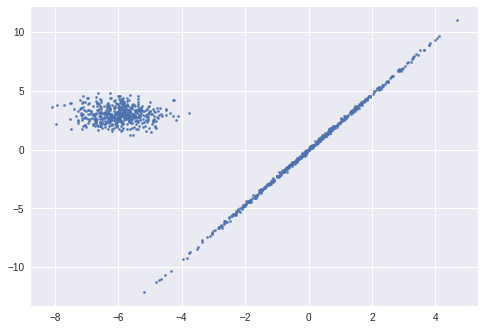

In [29]:
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
mu1 = np.array([0,0])
mu2 = np.array([-6,3])

sigma1 = np.array([[0. , -0.1 ], [1.7 ,4 ]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples ,2), sigma1) +mu1 ,
          0.7 * np.dot(randn(n_samples ,2), sigma2) +mu2 ,]
print(X)
plt.scatter(X[:,0], X[:,1] ,s=5)

In [7]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2 , init_params ="random", random_state= 0 ,max_iter =1)
model.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
gamma = model.predict_proba(X)
gamma = np.hstack([gamma, np.zeros((1000, 1))])
gamma

array([[0.50765364, 0.49234636, 0.        ],
       [0.57824799, 0.42175201, 0.        ],
       [0.50817537, 0.49182463, 0.        ],
       ...,
       [0.48210397, 0.51789603, 0.        ],
       [0.48494494, 0.51505506, 0.        ],
       [0.48140301, 0.51859699, 0.        ]])

[[0.35124628 0.30139294 0.0021923 ]
 [0.71153964 0.14878039 0.0021923 ]
 [0.35308363 0.29982457 0.0021923 ]
 ...
 [0.27205138 0.38912925 0.0021923 ]
 [0.27989112 0.37822975 0.0021923 ]
 [0.27015108 0.39186647 0.0021923 ]]


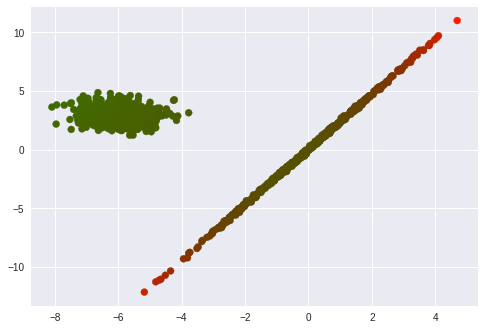

In [16]:
k= 10
softmax = np.exp(k*gamma - np.max(k*gamma))
print(softmax)
plt.scatter(X[:, 0], X[:, 1], facecolors= softmax)
plt.show()

In [0]:
def plot_gaussianmixture(n, k=10) :
    model = GaussianMixture(n_components=2 , init_params = "random", random_state = 1 , tol = 1e-9 , max_iter =n)
    model.fit(X)
    gamma = model.predict_proba(X)
    gamma = np.hstack([gamma , np.zeros((1000,1))])
    softmax = np.exp(k*gamma - np.max(k*gamma) )
    plt.scatter(X[:, 0], X[:,1], facecolors = softmax)
    plt.show()
    return model


/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


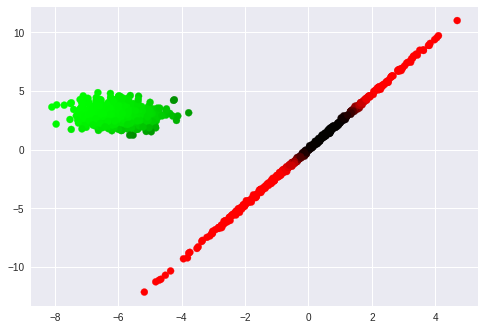

GaussianMixture(covariance_type='full', init_params='random', max_iter=6,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
plot_gaussianmixture(6)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


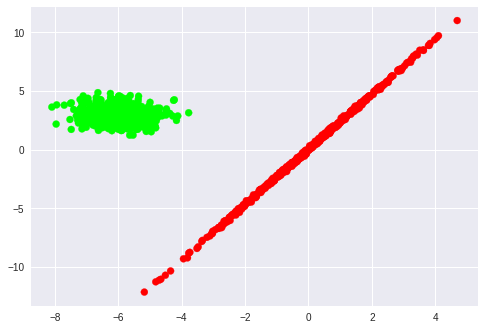

GaussianMixture(covariance_type='full', init_params='random', max_iter=10,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
plot_gaussianmixture(10)

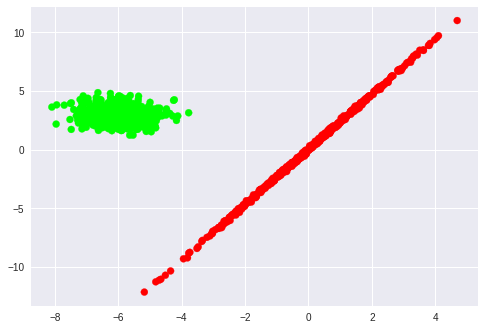

GaussianMixture(covariance_type='full', init_params='random', max_iter=15,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
plot_gaussianmixture(15)